## Adding CPI and Interest Rates to Lasso Model

Data being imported has been preprocessed. Let's see how Lasso model performs if we add consumer price index and interest rates.

### Adding CPI

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('edw_launch_price_data_with_am_sp_word_embed_preprocessed.csv')
df.head()

,pid,zone,micro_market_number,developer_number,project_number,wap,log_wap,proj_bedrooms_clean,unit_type,proj_launched_units,...,bp5,bp6,bp7,bp8,bp48,bp58,size_range,size_rv,mm_cluster,dev_cluster
0,1,Zone A,1,1,1,14464.0000,9.579418,1 and more,Apartment,111,...,0.0,0.0,0.0,0.0,0.0,0.0,432.27,1.383353,7,16
1,2,Zone A,1,2,2,13982.0000,9.545526,2 and more,Apartment,150,...,0.0,0.0,0.0,0.0,0.0,0.0,272.43,0.372748,7,16
2,3,Zone A,1,2,3,13982.0000,9.545526,2 and more,Apartment,150,...,0.0,0.0,0.0,0.0,0.0,0.0,272.43,0.372748,7,16
3,6,Zone A,1,5,6,12857.0000,9.461644,1 and more,Apartment,120,...,0.0,0.0,0.0,0.0,0.0,0.0,320.55,1.187398,7,3
4,7,Zone A,1,7,8,16981.5758,9.739884,1 and more,Apartment,33,...,0.0,0.0,0.0,0.0,0.0,0.0,1035.43,1.519184,7,11


In [2]:
cpi_urban=pd.read_csv('CPI_Urban_Housing.csv')
cpi_urban

,Date,Housing
0,1/1/2013,100.3
1,1/2/2013,100.4
2,1/3/2013,100.4
3,1/4/2013,100.5
4,1/5/2013,100.5
5,1/6/2013,106.6
6,1/7/2013,107.7
7,1/8/2013,108.9
8,1/9/2013,109.7
9,1/10/2013,110.5


In [3]:
# Dictionary mapping CPI urban to project launch dates
cpi_urban_index = dict(zip(cpi_urban['Date'], cpi_urban['Housing']))
# Map CPI index to their respective project launch dates
df['cpi_urban']=df['launch_date'].map(cpi_urban_index)

Now, let us add interest rates.

Website for reference:
https://www.bankbazaar.com/finance-tools/emi-calculator/current-rbi-bank-interest-rates.html

In [4]:
interest_rates=pd.read_csv('Interest Rates_RBI.csv')
interest_rates

,Date,Interest Rate
0,1/1/2013,0.0675
1,1/2/2013,0.0675
2,1/3/2013,0.0675
3,1/4/2013,0.0675
4,1/5/2013,0.0725
5,1/6/2013,0.0725
6,1/7/2013,0.0725
7,1/8/2013,0.0725
8,1/9/2013,0.0725
9,1/10/2013,0.0750


In [5]:
# Dictionary mapping interest rates to project launch dates
interest_rates_index = dict(zip(interest_rates['Date'], interest_rates['Interest Rate']))
# Map interest rates to their respective project launch dates
df['interest_rates']=df['launch_date'].map(interest_rates_index)

## Lasso Regression

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")
sns.set_color_codes("dark")

In [7]:
df_= df[['log_wap','b2','b3','bp1','bp2','bp4','bp58','size_rv','cpi_urban','interest_rates','V1','V2','V3','V4','V6','V7','V9','V10','V11','V13','V16','V21','V23','V24']]
df1=pd.concat([df_, pd.get_dummies(df['mm_cluster'],dtype=float),pd.get_dummies(df['dev_cluster'],dtype=float), pd.get_dummies(df['construction_status'],dtype=float)],axis=1)
df1.head()

,log_wap,b2,b3,bp1,bp2,bp4,bp58,size_rv,cpi_urban,interest_rates,...,11,13,14,15,16,17,18,Completed,Pre Launch,Under Construction
0,9.579418,5,0,0.954955,0.045045,0.0,0.0,1.383353,119.9,0.0725,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,9.545526,98,52,0.000000,0.653333,0.0,0.0,0.372748,113.9,0.0800,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,9.545526,98,52,0.000000,0.653333,0.0,0.0,0.372748,113.9,0.0800,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,9.461644,13,0,0.891667,0.108333,0.0,0.0,1.187398,124.4,0.0675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.739884,22,10,0.030303,0.666667,0.0,0.0,1.519184,120.9,0.0725,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
from sklearn.model_selection import train_test_split

dept = 'log_wap'
indept = df1.columns != dept
x = df1.loc[:,indept]
y = df1[dept]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001,max_iter=10000, tol=0.0001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
from sklearn.model_selection import cross_validate

# cross validate
scores_lasso = cross_validate(lasso, x_train, y_train, cv=8,
                        return_train_score=True,
                        return_estimator=False)
scores_lasso=pd.DataFrame(scores_lasso)
scores_lasso

,fit_time,score_time,test_score,train_score
0,0.053375,0.0,0.943173,0.947647
1,0.046873,0.0,0.938930,0.948453
2,0.037795,0.0,0.949188,0.947000
3,0.031247,0.0,0.938401,0.948339
4,0.046867,0.0,0.951535,0.946689
5,0.084628,0.0,0.945275,0.947436
6,0.069004,0.0,0.941416,0.948161
7,0.046861,0.0,0.939655,0.948266


In [10]:
print('Mean Test Score of Lasso Regressor: ', scores_lasso['test_score'].mean())
print('Mean Train Score of Lasso Regressor: ', scores_lasso['train_score'].mean())

Mean Test Score of Lasso Regressor:  0.9434466556352854
Mean Train Score of Lasso Regressor:  0.9477489608879966


In [11]:
def model_r2score (model, x_testdataframe, y_testdataframe):
    from sklearn.metrics import r2_score
    
    y_predicted_values=model.predict(x_testdataframe)
    return (print('R2 Score of', model, ':',r2_score(y_testdataframe, y_predicted_values)))


def compute_residual (model, column, dataframe, xtest_dataframe, y_testdataframe):
    y_pred=model.predict(xtest_dataframe)
    y_pred_wap=np.exp(y_pred)
    y_actual_wap=np.exp(y_testdataframe)
    y_resid = y_actual_wap - y_pred_wap
    dataframe[column]=pd.DataFrame(y_resid)
    return(dataframe[column].describe())


def percentage_error_projects (dataframe, residual, percentage_error):
    #Calculate percentage error w.r.t wap
    dataframe[percentage_error]=(dataframe[residual]/dataframe['wap'])*100
    #Split percentage error into equal intervals
    dataframe['percentage_error_interval'] = pd.cut(dataframe[percentage_error], bins=[-float("inf"),-100,-70,-50,-30,-20,-10,0,10,20,30,50,float("inf")])
    # How many projects in each interval of wap?
    grouped_df = dataframe.groupby('percentage_error_interval')['project_number'].count().reset_index()
    # Percentage of projects under each interval
    grouped_df['percentage_projects']=(grouped_df['project_number']/grouped_df['project_number'].sum())*100
    return (grouped_df) 

In [12]:
model_r2score (lasso, x_test, y_test)

R2 Score of Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) : 0.9429888789959918


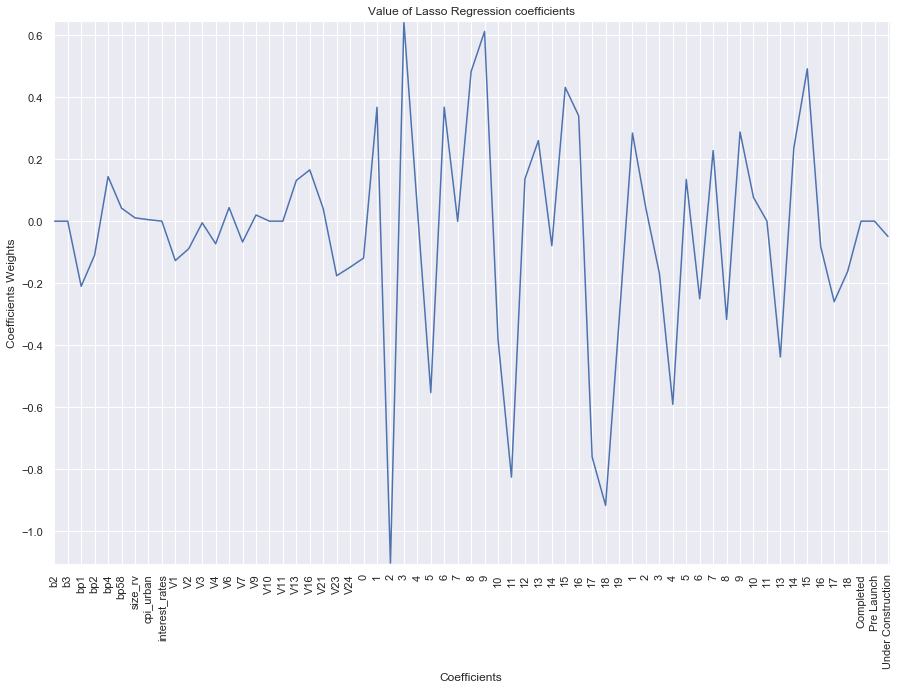

In [13]:
# Plot the Lasso Regression coefficients importance
plt.figure(figsize=(15,10)) 
plt.plot(range(len(x_train.columns)), lasso.coef_)
plt.xticks(range(len(x_train.columns)), x_train.columns, rotation=90) 
plt.margins(0.002)
plt.xlabel('Coefficients')
plt.ylabel('Coefficients Weights')
plt.title('Value of Lasso Regression coefficients')
plt.show()

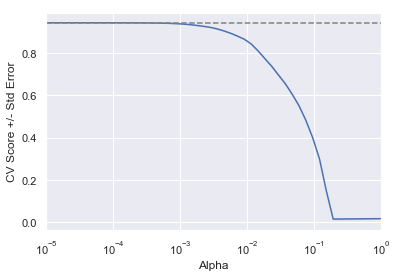

In [14]:
from sklearn.model_selection import cross_val_score

# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-5, 0, 50)
lasso_scores = []
lasso_scores_std = []

# Compute scores over range of alphas
for alpha in alpha_space:
    # Specify the alpha value to use: ridge.alpha
    lasso.alpha = alpha
    # Perform 10-fold CV: lasso_cv_scores again with a different sklearn library of course
    lasso_cv_scores = cross_val_score(lasso, x_train, y_train, cv=8)
    # Append the mean of lasso_cv_scores to lasso_scores
    lasso_scores.append(np.mean(lasso_cv_scores))
    # Append the std of lasso_cv_scores to lasso_scores_std
    lasso_scores_std.append(np.std(lasso_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(lasso_scores, lasso_scores_std)

(2.5118864315095876e-07,
 3981071.705534961,
 -1.191883829541514,
 0.7695534652159823)

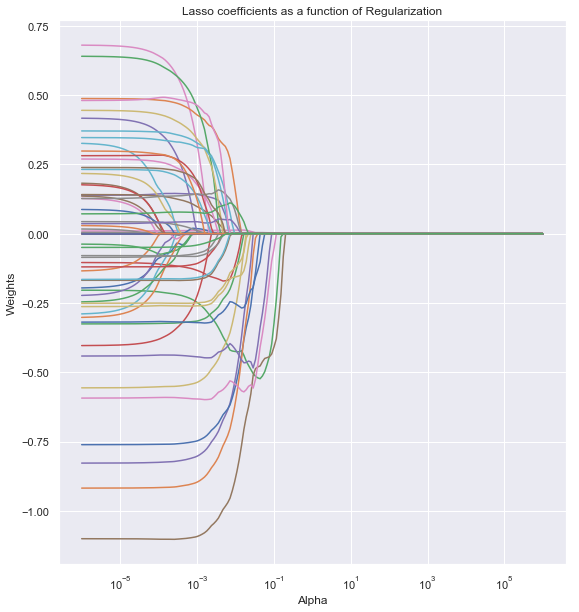

In [15]:
coefs = []
alphas = np.logspace(-6, 6, 200)

#Save same dataframe containing lasso regressor features with different name as we are trying a wide different
#range of alphas
lasso_clone = Lasso(alpha=0.0001,max_iter=100000, tol=0.0001)

# Train the model with different regularisation strengths
for a in alphas:
    lasso_clone.set_params(alpha=a) #Alpha parameter variation
    lasso_clone.fit(x_train, y_train)
    coefs.append(lasso_clone.coef_) 
    
# Display results
plt.figure(figsize=(20, 10))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Lasso coefficients as a function of Regularization')
plt.axis('tight')

In [16]:
compute_residual (lasso, 'residual_lasso', df, x_test, y_test)  # Residual statistics of Lasso Regressor

count      656.000000
mean      -116.735601
std       2484.243080
min     -20992.486422
25%       -819.396124
50%         -6.181850
75%        585.891684
max      11768.799468
Name: residual_lasso, dtype: float64

In [17]:
percentage_error_projects (df, 'residual_lasso', 'percentage_error_lasso')

,percentage_error_interval,project_number,percentage_projects
0,"(-inf, -100.0]",3,0.457317
1,"(-100.0, -70.0]",5,0.762195
2,"(-70.0, -50.0]",8,1.219512
3,"(-50.0, -30.0]",31,4.725610
4,"(-30.0, -20.0]",38,5.792683
5,"(-20.0, -10.0]",104,15.853659
6,"(-10.0, 0.0]",144,21.951220
7,"(0.0, 10.0]",173,26.371951
8,"(10.0, 20.0]",104,15.853659
9,"(20.0, 30.0]",32,4.878049


In [18]:
# Mean Absolute Percentage Error for Lasso Regressor
print('MAPE of Lasso Regressor:',np.absolute(df['percentage_error_lasso']).mean())

MAPE of Lasso Regressor: 13.836970726384967


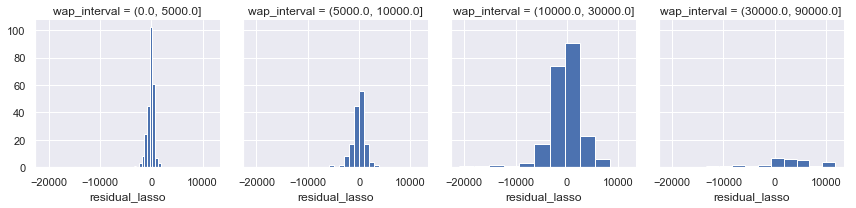

In [19]:
# Split up wap into intervals
df['wap_interval'] = pd.cut(df['wap'], bins=[0,5e+3,1e+4,3e+4,9e+4]) 
sns.FacetGrid(df, col="wap_interval").map(plt.hist, "residual_lasso")

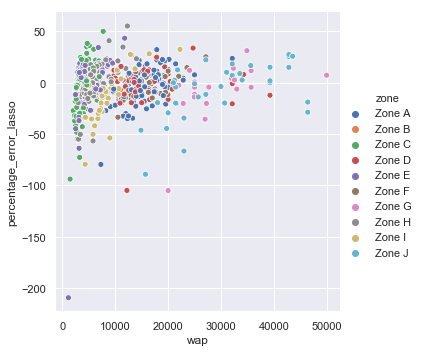

In [20]:
sns.relplot(x="wap", y="percentage_error_lasso", hue="zone", data=df)

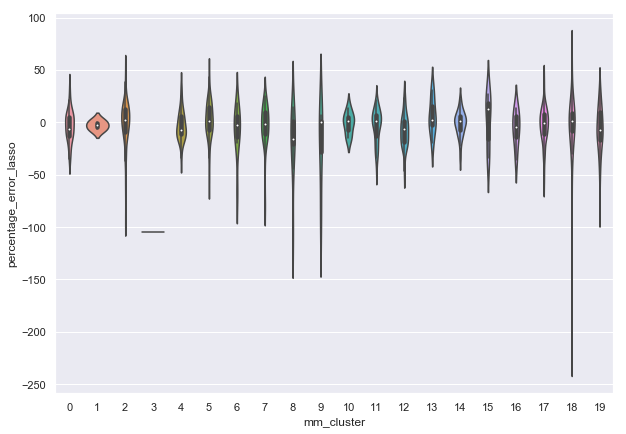

In [21]:
f, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x="mm_cluster", y="percentage_error_lasso", data=df)

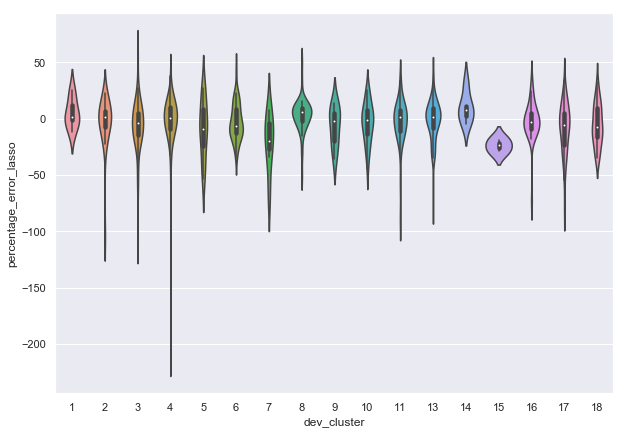

In [22]:
f, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x="dev_cluster", y="percentage_error_lasso", data=df)